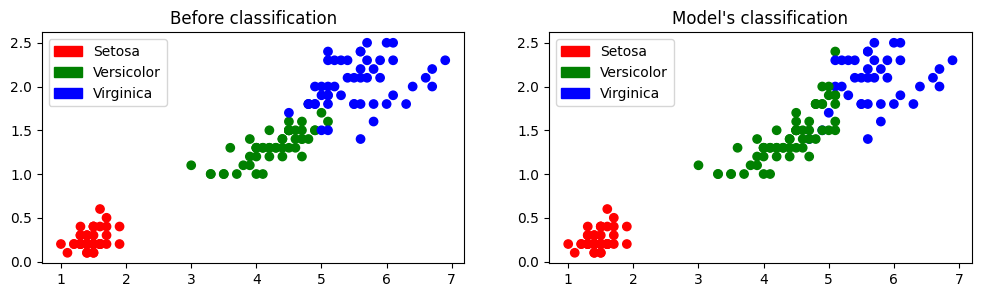

Accuracy: 0.8866666666666667


In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm

iris = datasets.load_iris()

x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])


iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)


iris_k_mean_model.cluster_centers_
iris_k_mean_model.labels_

plt.figure(figsize=(12, 3))
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)


plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])


plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])


plt.show()


accuracy = sm.accuracy_score(predictedY, y['Target'])
print(f'Accuracy: {accuracy}')


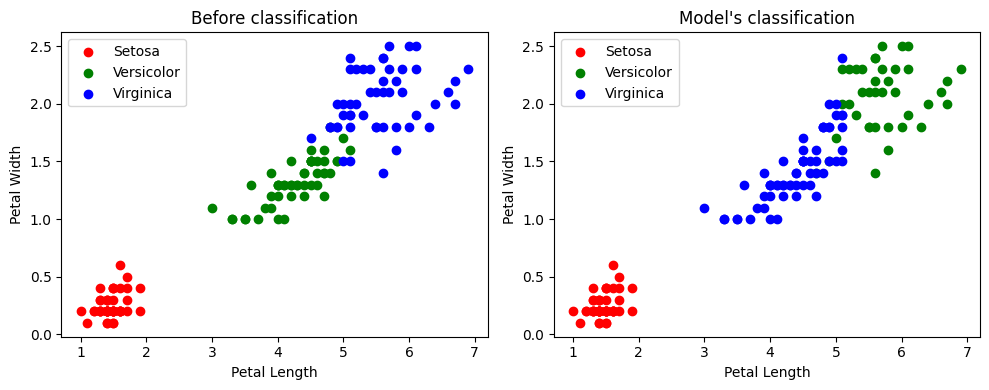

Accuracy: 0.45
Adjusted Rand Index: 0.72


In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as sm

# Load iris dataset and create DataFrame
iris = datasets.load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
predictedY = kmeans.fit_predict(x)

# Adjust predicted labels to match the true labels
predictedY = np.choose(predictedY, [1, 0, 2])

# Plot results before and after classification
colors = np.array(['red', 'green', 'blue'])
labels = ['Setosa', 'Versicolor', 'Virginica']

plt.figure(figsize=(10, 4))

# Before classification
plt.subplot(1, 2, 1)
for i, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(x.iloc[y == i, 2], x.iloc[y == i, 3], c=color, label=label)
plt.title('Before classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# After classification (model's prediction)
plt.subplot(1, 2, 2)
for i, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(x.iloc[predictedY == i, 2], x.iloc[predictedY == i, 3], c=color, label=label)
plt.title("Model's classification")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate accuracy and adjusted Rand index
print(f'Accuracy: {sm.accuracy_score(y, predictedY):.2f}')
print(f'Adjusted Rand Index: {sm.adjusted_rand_score(y, predictedY):.2f}')
